# Creazione della griglia per il modello WHETGEO1D the grid for WHETGEO 1D 
    -Author: Niccolò Tubini and Riccardo Rigon
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
-----

librerie

In [1]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf
from WHETGEO1D_GridCreator import*
from WHETGEO1D_toNetCDF import*

import warnings
warnings.filterwarnings('ignore')
####### Plot settings #######
nice_fonts = {
        "legend.frameon": True,

        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.3,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
       "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
       "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())


## Define input:
**grid_input_file_name**: name of the grid input file (.csv) with the local file path 
   
> `/data/Grid_input/name.csv`

**ic_input_file_name**: name of the initial condition input file (.csv) with the local file path 
> `/data/Grid_input/name.csv`

**parameter_input_file_name**: name of the parameter input file (.csv) with the local file path 
>`/data/Grid_input/name.csv`

**dictionary_input_file_name**: name of the file (.csv) containing the dictionary for parameters name 
>`/data/Grid_input/name.csv`

**grid_type**: string defining how to discretize the 1D domain. You can choose among:
> `classical`

> `exponential`

> `mixed` 


**dz_min**: thickness of the first layer (for `exponential` and `mixed`)

**dz_max**: larger thickness of the grid (for `mixed`)

**b**: growth rate (for `exponential` and `mixed`)

**psi_interp_model**: string defining the type of the 1D interpolation function used to define the initial condition for water suction 
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 

**T_interp_model**: string defining the type of the 1D interpolation function used to define the initial condition for temperature
>https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 

**water_ponding_0**: double [m] defining the water suction at soil surface. If it is larger than $0$ means that there is water ponding.

**T_water_ponding_0**: double [K] defining the temperature at soil surface. 
<br />
<br />

**output_file_name**: name of the output file (.nc) with the local file path
>`/data/Grid_NetCDF/name.nc`

**output_title**: string containing a title for the output, it is saved within the file

**output_summary**: string containing a description for the output, it is saved within the file (global metadata)

**output_date**: string containing the date of file creation, optionally

**output_institution**: string containing the name of whom created the file, optionally



In [2]:
# tipo geometria

grid_input_file_name = project_path + "/data/Grid_input/ex02_grid_esercitazione_perissini.csv"

#condizioni iniziali

ic_input_file_name = project_path + "/data/Grid_input/ex01_ic_esercitazione_perissini.csv"

# file parametri SWRC

parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"

dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

#tipo di griglia:

#classical: suddividere ogni layer con numero di volumi di controllo a scelta con stessa dimensione
#esponential: numero di volumi di controllo maggiore in superficie, diminmuiscono verso il fondo
#mixed: misto tra esponenziale e classica, numerod ivolumi di controllo maggiore nelle interfacce tra diversi layer

grid_type = 'classical'

dz_min = 0.01

dz_max = 0.05

b = 0.5
# metodo per interpolare la psi
psi_interp_model = "linear"
# metodo di interpolazione per temperatura
T_interp_model = "linear"

#suzione in superficie

water_ponding_0 = 20.0
# 0.0 se c'è la falda in superficie
# temperatura

T_water_ponding_0 = 293.15


output_file_name =  project_path + "/data/Grid_NetCDF/ex02_grid_perissini.nc"


output_title = '''
'''
output_summary = '''


'''

output_date = ''

output_institution = 'GEOframe'



## Run

In [3]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type   eta   K  equationStateID  parameterID
0    L  0.00   3              1.0          4.0
1    L -0.07   9              1.0          3.0
2    L -0.25  10              1.0          2.0
3    L -0.45  18              1.0          7.0
4    L -0.80  35              1.0          9.0
5    L -1.50   0              NaN          NaN

IC
   eta   Psi0      T0
0 -0.0    0.2  293.15
1 -1.5 -100.0  293.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5          1.000000e-08         4.400000e-10   
1     0.41   0.057  2.28   12.4          1.000000e-08         4.400000e-10   
2     0.41   0.065  1.89    7.5          1.000000e-08         4.400000e-10   
3     0.45   0.067  1.41    2.0          1.000000e-08         4.400000e-10   
4     0.43   0.078  1.56    3.6          1.000000e-08         4.400000e-10   
5     0.39   0.100  1.48    5.9          1.000000e-08         4.400000e-10   
6     0.43   0.089  1.23    1.4        

https://www.mtsn.tn.it/pubblicazioni/18/85/5.pdf

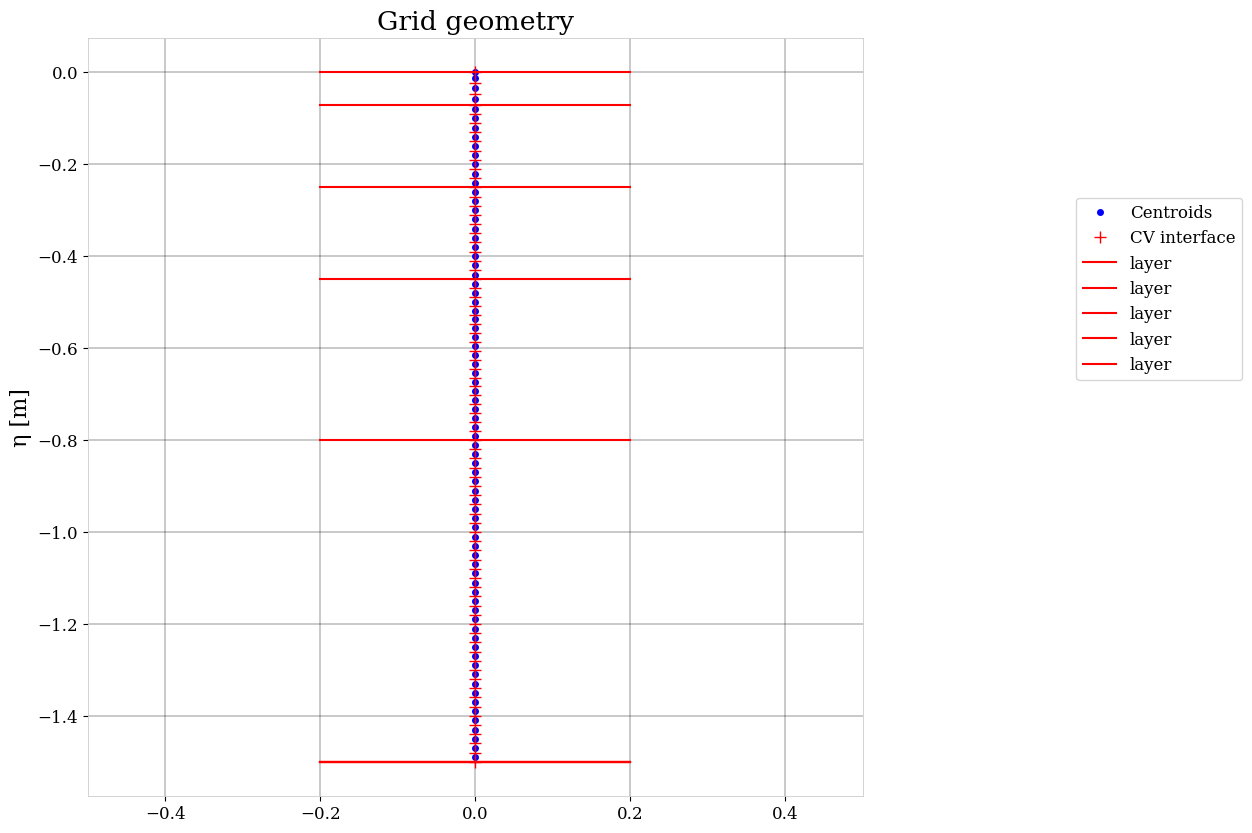

In [4]:
showMesh(data_grid)

## Per vedere condizione iniziale

# librerie

In [5]:
import xarray as xr
import matplotlib.style as style 
style.available
style.use('seaborn-whitegrid')
nice_fonts = {
        "legend.frameon": True,"legend.fancybox": True,"legend.facecolor": "white","axes.edgecolor": "0.8","axes.linewidth": 0.6,"grid.linewidth":0.4,
        "text.usetex": False,"font.family": "serif","axes.labelsize": 16,"font.size": 16,"legend.fontsize": 14,"xtick.labelsize": 14,"ytick.labelsize": 14,}
plt.rcParams.update(nice_fonts)

**Here you can inspect the netCDF file**

In [6]:
ds = xr.open_dataset(project_path + '/data/Grid_NetCDF/ex02_grid_perissini.nc')

ds è variabile con 101 volumi di controllo, il 1 sta per il volume di controllo in superficie, poi vengono elencate tutte le variabili nella griglia

In [7]:
ds

<xarray.Dataset>
Dimensions:               (scalar: 1, z: 76, z_dual: 76, space_delta: 77, control_volume_index: 1, parameter: 13)
Coordinates:
  * z                     (z) float64 0.01 0.03 0.05 0.07 ... 1.465 1.488 1.5
Dimensions without coordinates: scalar, z_dual, space_delta, control_volume_index, parameter
Data variables: (12/21)
    KMAX                  (scalar) int32 ...
    eta                   (z) float64 ...
    etaDual               (z_dual) float64 ...
    zDual                 (z_dual) float64 ...
    psi0                  (z) float64 ...
    T0                    (z) float64 ...
    ...                    ...
    par3SWRC              (parameter) float64 ...
    par4SWRC              (parameter) float64 ...
    par5SWRC              (parameter) float64 ...
    alphaSpecificStorage  (parameter) float64 ...
    betaSpecificStorage   (parameter) float64 ...
    ks                    (parameter) float64 ...
Attributes:
    title:         \n\ngrid input fileC:\Users\Jacopo\Desktop\UNI\Esercitazio...
    institution:   GEOframe
    summary:       \n\n\n
    date_created:

(-2.0, 7.0)

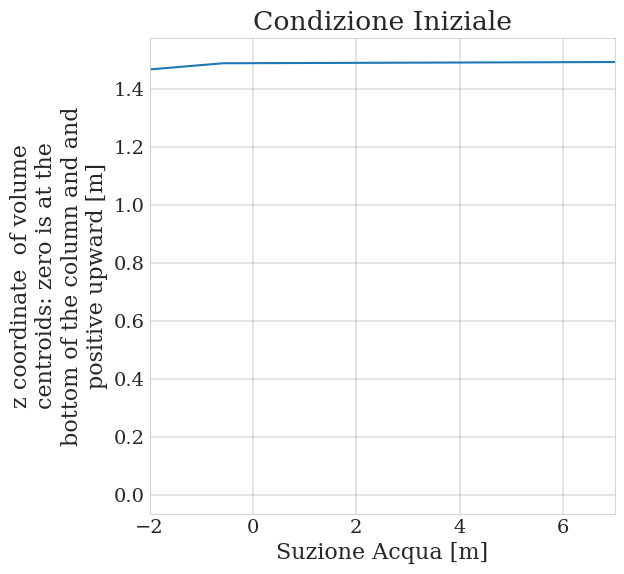

In [8]:
fig = plt.figure(figsize=(6,10/1.62))
ds.psi0.plot(y='z')
plt.xlabel('Suzione Acqua [m]')
plt.title('Condizione Iniziale')
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.xlim(-2.0, 7.0)